Обработка для создания списка компаний с наличием паспорта

In [6]:
import pandas as pd

file_path = 'df_p2.csv'
df = pd.read_csv(file_path, header=None)
df.columns = ['Компания', 'Город', 'Система', 'Тип системы', 'Год']
print(df.head())

                                Компания     Город  \
0                 Стройсервис (Кемерово)  Кемерово   
1                 Стройсервис (Кемерово)  Кемерово   
2  Атлас Майнинг (ранее Петропаловск ГК)    Москва   
3  Атлас Майнинг (ранее Петропаловск ГК)    Москва   
4  Атлас Майнинг (ранее Петропаловск ГК)    Москва   

                                      Система  \
0  VisionLabs Thermo (ранее VisionLabs Termo)   
1                             TrueConf Server   
2                                 Directum RX   
3                           Directum Projects   
4                           Datareon Platform   

                                         Тип системы   Год  
0  ИБ - Биометрическая идентификация,Системы виде...  2021  
1                           SaaS,Видеоконференцсвязь  2019  
2                                   BPM,HRM,SaaS,СЭД  2022  
3                       Системы управления проектами  2021  
4  Data Quality - Качество данных,MDM - Master Da...  2016  


In [7]:
df['Тип системы'] = df['Тип системы'].str.split(',')
# Развертывание списков в отдельные строки
df = df.explode('Тип системы')

# Выводим первые строки для проверки
print(df.head())

                                Компания     Город  \
0                 Стройсервис (Кемерово)  Кемерово   
0                 Стройсервис (Кемерово)  Кемерово   
1                 Стройсервис (Кемерово)  Кемерово   
1                 Стройсервис (Кемерово)  Кемерово   
2  Атлас Майнинг (ранее Петропаловск ГК)    Москва   

                                      Система  \
0  VisionLabs Thermo (ранее VisionLabs Termo)   
0  VisionLabs Thermo (ранее VisionLabs Termo)   
1                             TrueConf Server   
1                             TrueConf Server   
2                                 Directum RX   

                         Тип системы   Год  
0  ИБ - Биометрическая идентификация  2021  
0             Системы видеоаналитики  2021  
1                               SaaS  2019  
1                Видеоконференцсвязь  2019  
2                                BPM  2022  


In [8]:
df= df[df['Год'] != 2025]
system_counts = df['Тип системы'].value_counts()
city_counts = df['Город'].value_counts()
unique_companies = df.drop_duplicates(subset=['Компания', 'Город'])
city_counts = unique_companies['Город'].value_counts()
print(city_counts)

Город
Москва             898
Санкт-Петербург    216
Нижний Новгород     60
Екатеринбург        50
Новосибирск         39
                  ... 
Новокузнецк          1
Крымск               1
Заречный             1
Тында                1
Апатиты              1
Name: count, Length: 174, dtype: int64


In [9]:
system_counts = df['Тип системы'].value_counts()
top_5 = system_counts.head(5)
others_count = system_counts[5:].sum()
top_5_with_others = pd.concat([top_5, pd.Series({'Другие': others_count})])
print(top_5_with_others)

SaaS      1019
СЭД        524
BPM        496
CRM        356
ERP        290
Другие    2546
dtype: int64


In [10]:
year_counts = df['Год'].value_counts().sort_index()
print(year_counts)

Год
2013    323
2014    265
2015    409
2016    421
2017    339
2018    531
2019    515
2020    483
2021    688
2022    489
2023    459
2024    309
Name: count, dtype: int64


In [11]:
city_counts = df['Город'].value_counts()
print(city_counts)

Город
Москва             2405
Санкт-Петербург     563
Нижний Новгород     146
Екатеринбург        117
Новосибирск         111
                   ... 
Кольчугино            1
Новокузнецк           1
Крымск                1
Заречный              1
Апатиты               1
Name: count, Length: 174, dtype: int64


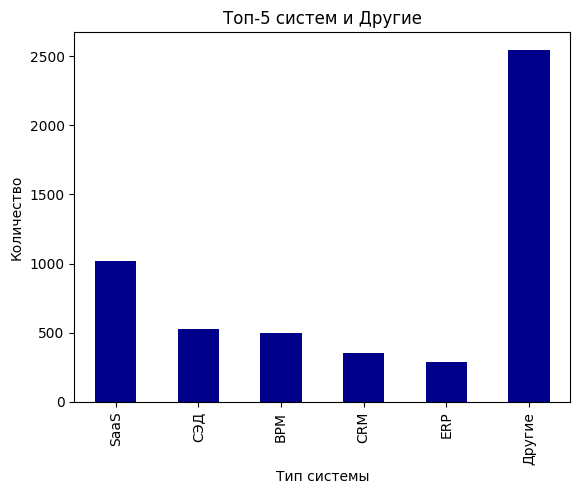

In [12]:
import matplotlib.pyplot as plt

top_5_with_others.plot(kind='bar', color='darkblue')
plt.title('Топ-5 систем и Другие')
plt.xlabel('Тип системы')
plt.ylabel('Количество')
plt.show()

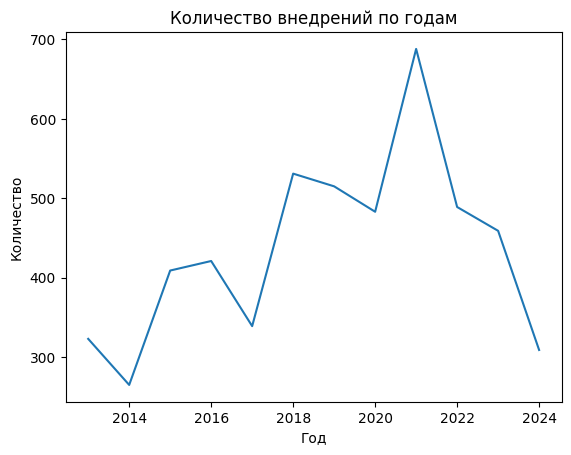

In [13]:
year_counts.plot(kind='line')
plt.title('Количество внедрений по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

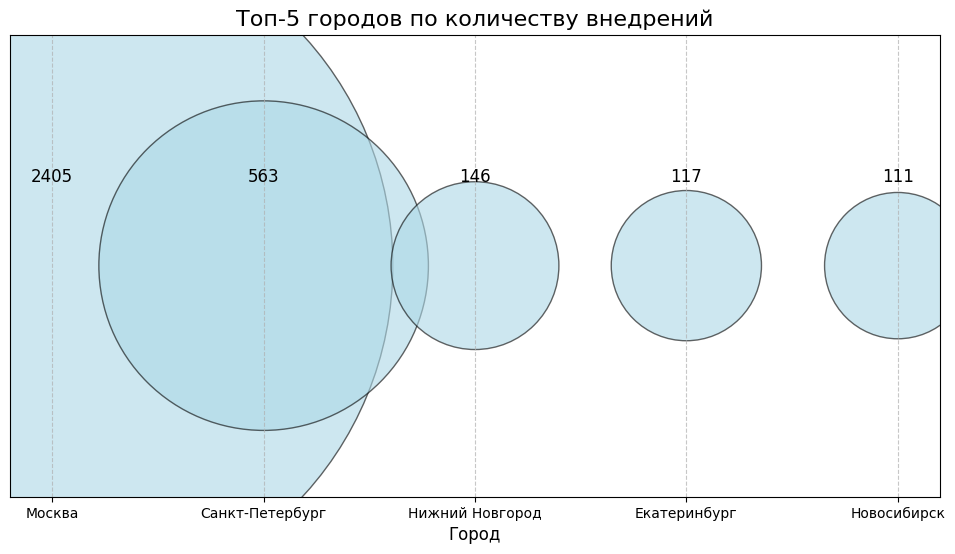

In [14]:
city_counts = df['Город'].value_counts().reset_index()
city_counts.columns = ['Город', 'Количество внедрений']

top_5_cities = city_counts.head(5)

plt.figure(figsize=(12, 6))
plt.scatter(
    top_5_cities['Город'],  
    [1] * len(top_5_cities), 
    s=top_5_cities['Количество внедрений'] * 100, 
    alpha=0.6, 
    color='lightblue',
    edgecolor='black'
)

plt.title('Топ-5 городов по количеству внедрений', fontsize=16)
plt.xlabel('Город', fontsize=12)
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, row in top_5_cities.iterrows():
    plt.text(
        row['Город'],
        1.02,
        f"{row['Количество внедрений']}",
        ha='center',
        fontsize=12
    )

plt.show()